In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib auto

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import skimage

In [4]:
import skdemo

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

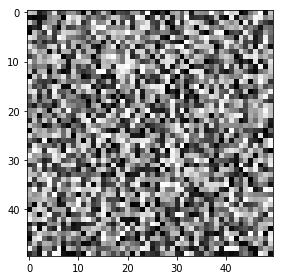

In [5]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([50, 50])

plt.imshow(random_image, cmap='gray', interpolation='nearest');
plt.tight_layout()

The same holds for "real-world" images:

<class 'numpy.ndarray'> uint8 (303, 384)


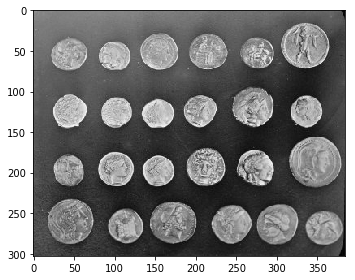

In [6]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.figure()
plt.imshow(coins, cmap='gray', interpolation='nearest');
plt.tight_layout()

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


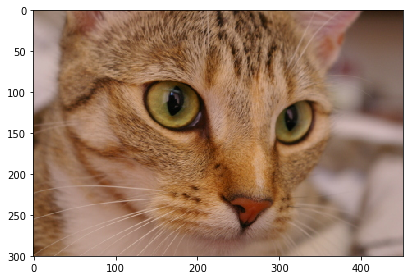

In [7]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');
plt.tight_layout()

These are *just numpy arrays*. Making a red square is easy using just array slicing and manipulation. Note that first dimension is row (y coordinate), second dimension is column (x coordinate) and last dimension is channel (R,G,B). Pixel coordinates start at (0,0) on the top-left corner.

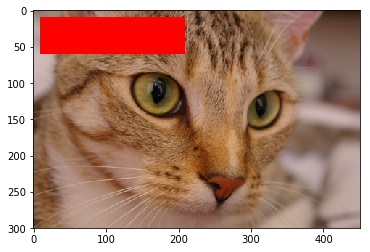

In [8]:
cat[10:60, 10:210, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th channel, called an *alpha layer*.

__Other shapes, and their meanings__

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

Let's generate two valid images and display them:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


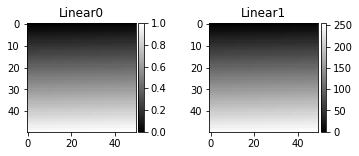

In [9]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6,2))
ax0.imshow(linear0, cmap='gray'); ax0.set_title('Linear0')
ax1.imshow(linear1, cmap='gray'); ax1.set_title('Linear1');
skdemo.colorbars()

They do not have the same values, but they look exactly the same !

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

This is achieved through the use of a few utility functions, such as ``img_as_float`` and ``img_as_ubyte``:

In [10]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Displaying images using matplotlib

Before we get started, a quick note about plotting images---specifically, plotting gray-scale images with Matplotlib. We'll want to make sure we have numpy and matplotlib imported.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

First, let's grab an example image from `scikit-image`.

In [12]:
from skimage import data

image = data.camera()

### Colormap

The colormap _maps_ scalar values to colors. Depending on the colormap, the same value of `image[i,j]` will be displayed as a different color.

If we plot a gray-scale image using the default colormap, `jet`, and a gray-scale color
map, `gray`, you can easily see the difference. Note that we added the colorbar to the side to see the colormap mapping from scalar values to colors.

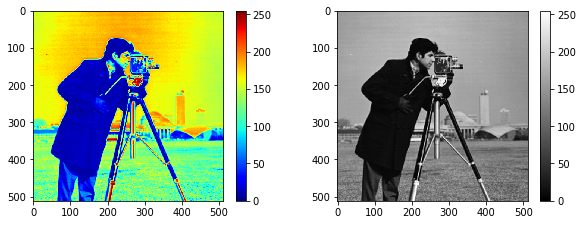

In [13]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 3.5))

im=ax_jet.imshow(image, cmap='jet'); plt.colorbar(im, ax=im.axes)
im=ax_gray.imshow(image, cmap='gray'); plt.colorbar(im, ax=im.axes);

Notice how the face looks distorted and splotchy with the `jet` colormap. Also, this colormap distorts the concepts of light and dark, and there are artificial boundaries created by the different color hues.

Here's another example:

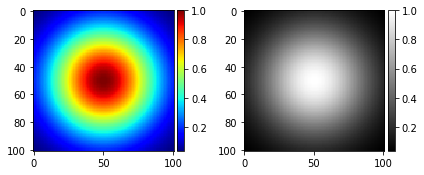

In [14]:
X, Y = np.mgrid[-5:5.1:0.1, -5:5.1:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');
skdemo.colorbars(); fig.tight_layout()

Woah!  See all those non-existing contours? 

Matplotlib has many different colormaps for various applications, that are almost always a better choice than `jet`. For instance:
- Perceptually uniform sequential colormap `viridis`
- Diverging colormaps (two different colors diverging from a central one) `seismic`
- Inverted grey levels `binary`

See more at https://matplotlib.org/examples/color/colormaps_reference.html

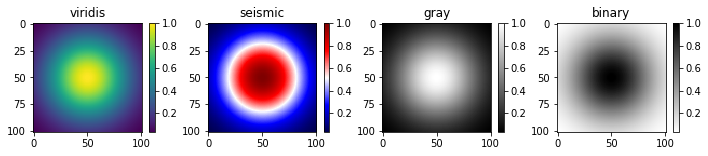

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(12, 2))

for i,cmap_name in enumerate(['viridis', 'seismic', 'gray', 'binary']):
    im=axes[i].imshow(R, cmap=cmap_name)
    plt.colorbar(im, ax=axes[i])
    axes[i].set_title(cmap_name)

Don't worry: color images are unaffected by this change. The colormap applies only to scalar images.

Note: To get a bit more insight into how `mgrid` worked, lets also display `X`, `Y` and `X**2+Y**2`:

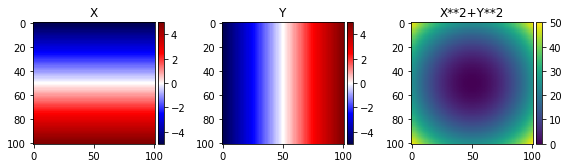

In [16]:
fig, (ax_X, ax_Y, ax_D) = plt.subplots(1, 3,figsize=(8,3))
ax_X.imshow(X, cmap='seismic'); ax_X.set_title('X')
ax_Y.imshow(Y, cmap='seismic'); ax_Y.set_title('Y')
ax_D.imshow((X**2+Y**2), cmap='viridis'); ax_D.set_title('X**2+Y**2')
skdemo.colorbars()
fig.tight_layout()

We have used ``numpy.ndgrid`` to generate a grid of `X[i,j]` and `Y[i,j]` values that go from -5 to 5. Array `R` is generated using element-wise operations that correspond to equation
$$R[i,j] = \exp\left(-\frac{X[i,j]^2+Y[i,j]^2}{15}\right)$$
$R[i,j]$  is maximal with value `1.0` in the center where $X[i,j]=Y[i,j]=0$, and decrease as the distance from the center increases.

To avoid having to set `cmap` explicitely in ``imshow``, you can add the following setting at the top of any script to change the default colormap:

In [17]:
plt.rcParams['image.cmap'] = 'gray'

### Interpolation method

What is displayed has always to be adapted to the screen. First thing is that the size of the image in pixels almost never corresponds to the size on the screen. The image has to be resized first, which matplotlib do automatically for us. When the size on screen is larger than the image size, interpolation is used to make it larger than it is actually.

Here, we create a simple image manually and display it using `nearest` and `bilinear` interpolation:

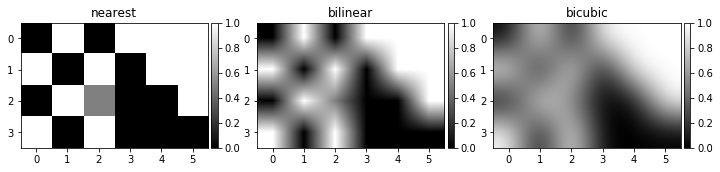

In [18]:
from matplotlib.ticker import MaxNLocator   
    
bitmap=np.array([[0,1,0,1,1,1],[1,0,1,0,1,1],[0,1,0.5,0,0,1],[1,0,1,0,0,0]])

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for i,interp_name in enumerate(['nearest', 'bilinear', 'bicubic']):
    im=axes[i].imshow(bitmap, interpolation=interp_name)
    #plt.colorbar(im, ax=axes[i],shrink=0.6)
    skdemo.add_colorbar(im)
    axes[i].set_title(interp_name)
    axes[i].set_xticks(range(bitmap.shape[1]))
    axes[i].set_yticks(range(bitmap.shape[0]))

- `nearest` simply replaces each pixel by a rectangle to match the display size. This is the approach that is the best to really control what we display, as it does not make any assumption on the content of the image.
- `bilinear` instead tries to produce a reconstruction of the real image assuming it is piecewise linear.
- `bicubic` is the default, and assume the real image should be smooth.

Let's see on a part of the photograph image:

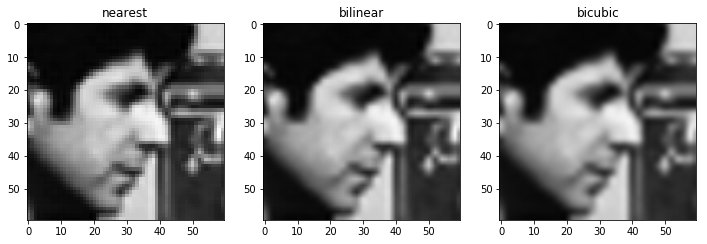

In [19]:
face = image[100:160, 220:280]

fig, axes = plt.subplots(1, 3, figsize=(12,5))

for i,interp_name in enumerate(['nearest', 'bilinear', 'bicubic']):
    im=axes[i].imshow(face, interpolation=interp_name)
    axes[i].set_title(interp_name)

To keep control and avoid any artifacts due to the interpolation, we can configure the default to `nearest`: 

In [20]:
plt.rcParams['image.interpolation'] = 'nearest'

### Interactive demo: interpolation and color maps

Let's first check the `interact` functionalities works. We should see a dropdown menu for `x`, and a slider for `y`.

In [21]:
from ipywidgets import interact, fixed, FloatSlider
from collections import OrderedDict

# Test Interactive demo
def f(x,y):
    print('The values are: ',x ,', ',y)
interact(f,x=OrderedDict((str(v), v) for v in [1,2,3,4,10,20]), y=FloatSlider(min=0,max=30,step=0.5))

The values are:  1 ,  0.0


<function __main__.f>

In [22]:
## Interactive code
from ipywidgets import interact, fixed, IntSlider
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

def imshow_params(image, cmap='gray', interpolation='bicubic', x0=0, y0=0):    
    N=16
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    
    reverse_cmap=False
    if reverse_cmap:
        cmap = cmap + '_r'
    
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].plot([x0,x0+N,x0+N,x0,x0],[y0,y0,y0+N,y0+N,y0],'r')
    axes[0].set_xlim(-0.5,image.shape[1]-0.5)
    axes[0].set_ylim(-0.5,image.shape[0]-0.5)
    axes[0].invert_yaxis()
    axes[0].set_title('Original')
    
    axes[1].imshow(image[y0:y0+N, x0:x0+N], cmap='gray', interpolation='nearest')
    axes[1].set_title('{N}x{N} block'.format(N=N))
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)
    
    axes[3].imshow(image[y0:y0+N, x0:x0+N], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('{N}x{N} block'.format(N=N))
    axes[3].set_xlabel('%s interpolation' % interpolation)
    
    #axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    #axes[4].set_title('%s colormap' % cmap)
    #axes[4].set_xlabel('%s interpolation' % interpolation)
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        
cmaplist=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower())

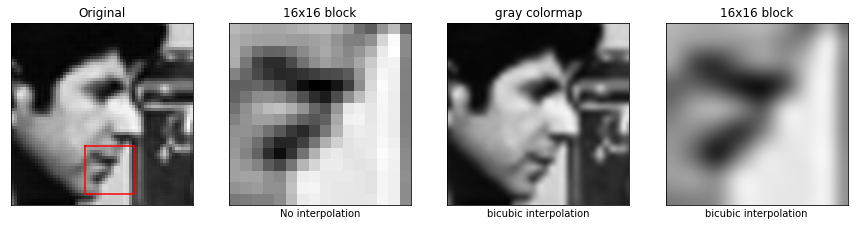

In [23]:
import warnings
warnings.filterwarnings('ignore')

w = interact(imshow_params, image=fixed(face),
          cmap=cmaplist,
          interpolation=['nearest', 'bilinear', 'bicubic', 'lanczos'],
          x0=IntSlider(value=24,min=0,max=48,step=1, continuous_update=False),
          y0=IntSlider(value=40,min=0,max=48,step=1, continuous_update=False))

warnings.filterwarnings('default')

## Image resizing

The library `skimage` allows to resize images either using a scaling factor (`transform.rescale`), or the size of the output image (`transform.resize`). A common application is if we want to process an image that is very large and we do not need all the details, we can rescale it before processing to reduce the memory and computational load.

Note: when displaying with `imshow`, the image is resized automatically to the plot area; we do not need to can these functions ourselves. Always look at the axes ticks to confirm the size of the actual image. For instance, in the next cell, the first and second image are displayed with the same size, but the second one has 4 times less pixels on each dimension.

In [26]:
image.shape

(512, 512)

Text(0.5,1,'(20, 30)')

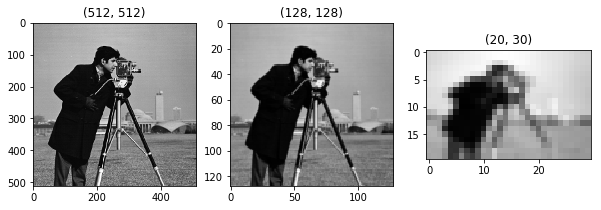

In [35]:
from skimage import transform

image2 = transform.rescale(image, 0.25, multichannel=False, mode='reflect', anti_aliasing=True)
image3 = transform.resize(image, [20,30], anti_aliasing=True, mode='reflect')

fig, axes = plt.subplots(1,3,figsize=(10,3))
axes[0].imshow(image);  axes[0].set_title("{}".format(image.shape))
axes[1].imshow(image2); axes[1].set_title("{}".format(image2.shape))
axes[2].imshow(image3); axes[2].set_title("{}".format(image3.shape))

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include matplotlib, pillow, imageio, imread, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whatever option is available:

<class 'numpy.ndarray'>
(300, 225, 3)


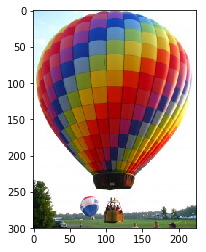

In [36]:
from skimage import io

balloon = io.imread('../images/balloon.jpg')

print(type(balloon))
plt.imshow(balloon);

print(balloon.shape)

We also have the ability to load multiple images, or multi-layer TIFF images:

In [38]:
ic = io.imread_collection('../images/*.png')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['../images/bwshapes.png', '../images/chapel_floor.png', '../images/clock_motion.png', '../images/fingers.png', '../images/letter_soup2.png', '../images/letter_soup3.png', '../images/letter_soup.png', '../images/snakes.png', '../images/zebrafish-spinal-cord-color.png', '../images/zebrafish-spinal-cord.png']


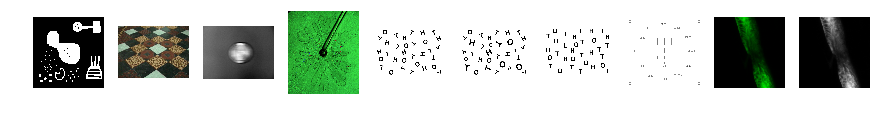

In [39]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns the image (optionally a copy) with green letter H overlaid at those coordinates. The coordinates should point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [40]:
def draw_H(image, coords, color=(0, 255, 0), in_place=False):
    if in_place:
        out = image
    else:
        out = image.copy()
    
    # your code goes here
    
    return out

Test your function like so:

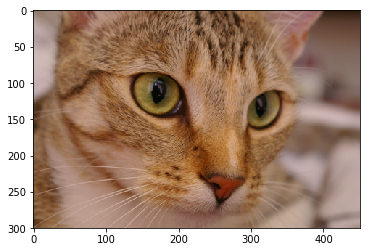

In [41]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise: RGB intensity plot</span>

Plot the intensity of each channel of the image along a given row.
Start with the following template:

In [42]:
def plot_intensity(image, row):
    # Fill in the three lines below
    red_values = 0   # TODO
    green_values = 0 # TODO
    blue_values = 0  # TODO
    
    plt.figure()
    plt.plot(red_values)
    plt.plot(green_values)
    plt.plot(blue_values)
    
    pass

Test your function here:

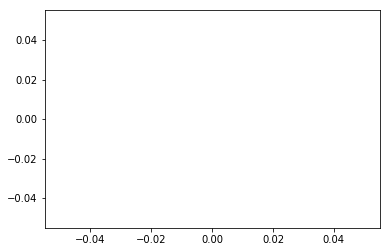

In [43]:
# TODO:
plot_intensity(cat, 50)
#plot_intensity(cat, 100)

## Exercise: Convert to black and white

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Text(0.5,1,'Reference Gray')

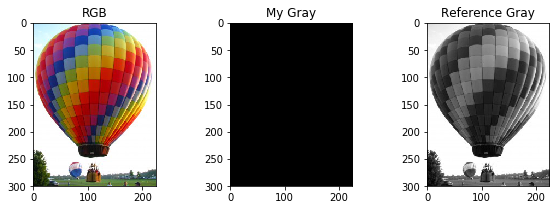

In [47]:
def myrgb2gray(image):
    # Write code to convert RGB to gray

    gray = 0.0*image[:,:,0] # TODO: replace this by the real gray value
    
    return gray

fig, axes = plt.subplots(1,3,figsize=(10,3))
axes[0].imshow(balloon); axes[0].set_title('RGB')
axes[1].imshow(myrgb2gray(balloon)); axes[1].set_title('My Gray')
axes[2].imshow(skimage.color.rgb2gray(balloon)); axes[2].set_title('Reference Gray')